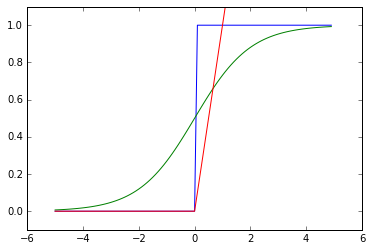

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#ステップ関数
def step_function(x):
    return np.array(x > 0, dtype=np.int)

#シグモイド関数
def sigmoid(x):
    return 1/(1+np.exp(-x))

#ReLU(Rectified Linear Unit)関数
def relu(x):
    return np.maximum(0, x)

x=np.arange(-5.0, 5.0, 0.1)
y=step_function(x)
plt.plot(x,y)

ysig=sigmoid(x)
plt.plot(x,ysig)

yrelu=relu(x)
plt.plot(x,yrelu)

plt.ylim(-0.1, 1.1)

plt.show()


In [2]:
#3.3.1.多次元配列
A = np.array([1,2,3,4])
print(A)
print("次元数:" , np.ndim(A))
print("配列の形状:" , A.shape)
print("列の形状:" , A.shape[0])

A = np.array([[1,2],[3,4],[5,6]])
print(A)
print("次元数:" , np.ndim(A))
print("配列の形状:" , A.shape)
print("列の形状:" , A.shape[0])

[1 2 3 4]
次元数: 1
配列の形状: (4,)
列の形状: 4
[[1 2]
 [3 4]
 [5 6]]
次元数: 2
配列の形状: (3, 2)
列の形状: 3


In [3]:
A = np.array([[1,2],[3,4]])
B = np.array([[5,6],[7,8]])
np.dot(A,B)

array([[19, 22],
       [43, 50]])

In [4]:
A = np.array([[1,2],[3,4],[5,6]])
print(A.shape)
B = np.array([[5,6,7,8],[7,8,9,10]])
print(B.shape)
np.dot(A,B)

(3, 2)
(2, 4)


array([[ 19,  22,  25,  28],
       [ 43,  50,  57,  64],
       [ 67,  78,  89, 100]])

In [5]:
#ニューラルネットワークの内積
import numpy as np
X = np.array([1,2])
print(X.shape)
W = np.array([[1,3,5],[2,4,6]])
print(W.shape)
Y = np.dot(X, W)
print(Y)

(2,)
(2, 3)
[ 5 11 17]


In [6]:
#3層ニューラルネットワークの内積
import numpy as np
X = np.array([1.0, 0.5])
W1 = np.array([[0.1 ,0.3 , 0.5],[0.2, 0.4 ,0.6]])
B1 = np.array([0.1, 0.2, 0.3])

A1 = np.dot(X, W1)+ B1
Z1 = sigmoid(A1)
print(A1)
print(Z1)

W2 = np.array([[0.1 ,0.4],[0.2, 0.5] ,[0.3, 0.6]])
B2 = np.array([0.1, 0.2])

A2 = np.dot(Z1, W2)+ B2
Z2 = sigmoid(A2)

print(A2)
print(Z2)

W3 = np.array([[0.1 ,0.3],[0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3)+ B3

print(A3)



[ 0.3  0.7  1.1]
[ 0.57444252  0.66818777  0.75026011]
[ 0.51615984  1.21402696]
[ 0.62624937  0.7710107 ]
[ 0.31682708  0.69627909]


In [7]:
#ソフトマックス関数
import numpy as np

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) #オーバーフロー対策
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

a = np.array([0.3, 2.9, 3.8])
y = softmax(a)
print(y)


[ 0.02101759  0.28297535  0.69600706]


In [8]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()
    
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)
img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28,28)
print(img.shape)

img_show(img)


5
(784,)
(28, 28)


In [18]:
import numpy as np
import pickle

#データの読み込み
def get_data():
    #normalize=True　正規化を行う。
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

#pklデータの読み込み
def init_network():
    with open("sample_weight.pkl", "rb") as f:
        network = pickle.load(f)
    return network

#ニューラルネットワーク
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

#手書き文字データの読み込み
x, t = get_data()
#pklデータを読み込み、重みをセットする
network = init_network()
#バッチの数
batch_size = 100
#正解数
accuracy_cnt = 0
for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])
        
print("Acceracy:" + str(float(accuracy_cnt) / len(x)))


Acceracy:0.6698
